# Deutsch's algorithm

Deutsch's algorithm solves the parity problem for the special case that $n = 1.$
In the context of quantum computing this problem is sometimes referred to as *Deutsch's problem*, and we'll follow that nomenclature in this lesson.

To be precise, the input is represented by a function $f:\Sigma \rightarrow \Sigma$ from one bit to one bit.
There are four such functions:

$$
\rule[-10mm]{0mm}{10mm}
\begin{array}{c|c}
  a & f_1(a)\\
  \hline
  0 & 0\\
  1 & 0
\end{array}
\qquad
\begin{array}{c|c}
  a & f_2(a)\\
  \hline
  0 & 0\\
  1 & 1
\end{array}
\qquad
\begin{array}{c|c}
  a & f_3(a)\\
  \hline
  0 & 1\\
  1 & 0
\end{array}
\qquad
\begin{array}{c|c}
  a & f_4(a)\\
  \hline
  0 & 1\\
  1 & 1
\end{array}
$$

The first and last of these functions are *constant* and the middle two are *balanced*, meaning that the two possible output values for the function occur the same number of times as we range over the inputs.
Deutsch's problem is to determine which of these two categories the input function belongs to: constant or balanced.

<Figure title="Deutsch's problem">
Input:  a function $f:\{0,1\}\rightarrow\{0,1\}$ \
Output: $0$ if $f$ is constant, $1$ if $f$ is balanced
</Figure>

If we view the input function $f$ in Deutsch's problem as representing random access to a string, we're thinking about a two-bit string: $f(0)f(1).$

$$
\begin{array}{cc}
\mathsf{function} & \mathsf{string}\\
\hline
f_1 & 00 \\
f_2 & 01 \\
f_3 & 10 \\
f_4 & 11
\end{array}
$$

When viewed in this way, Deutsch's problem is to compute the parity (or, equivalently, the exclusive-OR) of the two bits.

Every classical query algorithm that correctly solves this problem must query both bits: $f(0)$ and $f(1).$
If we learn that $f(1) = 1,$ for instance, the answer could still be $0$ or $1,$ depending on whether $f(0) = 1$ or $f(0) = 0,$ respectively.
Every other case is similar; knowing just one of two bits doesn't provide any information at all about their parity.
So, the Boolean circuit described in the previous section is the best we can do in terms of the number of queries required to solve this problem.

## Quantum circuit description

Deutsch's algorithm solves Deutsch's problem using a single query, therefore providing a quantifiable advantage of quantum over classical computations.
This may be a modest advantage — one query as opposed to two — but we have to start somewhere.
Scientific advances sometimes have seemingly humble origins.

Here is a quantum circuit that describes Deutsch's algorithm:

![Deutsch's algorithm](/learning/images/courses/fundamentals-of-quantum-algorithms/quantum-query-algorithms/Deutsch-circuit.svg)

## Analysis

To analyze Deutsch's algorithm, we will trace through the action of the circuit above and identify the states of the qubits at the times suggested by this figure:

![States during Deutsch's algorithm](/learning/images/courses/fundamentals-of-quantum-algorithms/quantum-query-algorithms/Deutsch-circuit-states.svg)

The initial state is $\vert 1\rangle \vert 0 \rangle,$ and the two Hadamard operations on the left-hand side of the circuit transform this state to

$$
\vert \pi_1 \rangle = \vert - \rangle \vert + \rangle
= \frac{1}{2} \bigl( \vert 0\rangle - \vert 1\rangle \bigr) \vert 0\rangle
+ \frac{1}{2} \bigl( \vert 0\rangle - \vert 1\rangle \bigr) \vert 1\rangle.
$$

(As always, we're following Qiskit's qubit ordering convention, which puts the top qubit to the right and the bottom qubit to the left.)

Next, the $U_f$ gate is performed.
According to the definition of the $U_f$ gate, the value of the function $f$ for the classical state of the top/rightmost qubit is XORed onto the bottom/leftmost qubit, which transforms $\vert \pi_1\rangle$ into the state

$$
\vert \pi_2 \rangle
= \frac{1}{2} \bigl( \vert 0 \oplus f(0) \rangle - \vert 1 \oplus f(0) \rangle \bigr) \vert 0 \rangle
+ \frac{1}{2} \bigl( \vert 0 \oplus f(1) \rangle - \vert 1 \oplus f(1) \rangle \bigr) \vert 1 \rangle.
$$

We can simplify this expression by observing that the formula

$$
\vert 0 \oplus a\rangle - \vert 1 \oplus a\rangle = (-1)^a \bigl( \vert 0\rangle - \vert 1\rangle \bigr)
$$

works for both possible values $a\in\Sigma.$
More explicitly, the two cases are as follows.

$$
\begin{aligned}
\vert 0 \oplus 0\rangle - \vert 1 \oplus 0\rangle
& = \vert 0 \rangle - \vert 1 \rangle
= (-1)^0 \bigl( \vert 0\rangle - \vert 1\rangle \bigr)\\
\vert 0 \oplus 1\rangle - \vert 1 \oplus 1\rangle & = \vert 1 \rangle - \vert 0\rangle
= (-1)^1 \bigl( \vert 0\rangle - \vert 1\rangle \bigr)
\end{aligned}
$$

Thus, we can alternatively express $\vert\pi_2\rangle$ like this:

$$
\begin{aligned}
  \vert\pi_2\rangle
  & = \frac{1}{2} (-1)^{f(0)} \bigl( \vert 0 \rangle - \vert 1 \rangle \bigr) \vert 0 \rangle
  + \frac{1}{2} (-1)^{f(1)} \bigl( \vert 0 \rangle - \vert 1 \rangle \bigr) \vert 1 \rangle \\
  & = \vert - \rangle \biggl( \frac{(-1)^{f(0)} \vert 0\rangle + (-1)^{f(1)} \vert 1\rangle}{\sqrt{2}}\biggr).
\end{aligned}
$$

Something interesting just happened!
Although the action of the $U_f$ gate on standard basis states leaves the top/rightmost qubit alone and XORs the function value onto the bottom/leftmost qubit, here we see that the state of the top/rightmost qubit has changed (in general) while the state of the bottom/leftmost qubit remains the same — specifically being in the $\vert - \rangle$ state before and after the $U_f$ gate is performed.
This phenomenon is known as the *phase kickback*, and we will have more to say about it shortly.

With one final simplification, which is to pull the factor of $(-1)^{f(0)}$ outside of the sum, we obtain this expression of the state $\vert\pi_2\rangle$:

$$
\begin{aligned}
  \vert\pi_2\rangle
  & = (-1)^{f(0)} \vert - \rangle
      \biggl( \frac{\vert 0\rangle + (-1)^{f(0) \oplus f(1)} \vert 1\rangle}{\sqrt{2}}\biggr) \\
  & = \begin{cases}
        (-1)^{f(0)} \vert - \rangle \vert + \rangle & \text{if $f(0) \oplus f(1) = 0$}\\[1mm]
        (-1)^{f(0)} \vert - \rangle \vert - \rangle & \text{if $f(0) \oplus f(1) = 1$}.
      \end{cases}
\end{aligned}
$$

Notice that in this expression, we have $f(0) \oplus f(1)$ in the exponent of $-1$ as opposed to $f(1) - f(0),$ which is what we might expect from a purely algebraic viewpoint, but we obtain the same result either way.
This is because the value $(-1)^k$ for any integer $k$ depends only on whether $k$ is even or odd.

Applying the final Hadamard gate to the top qubit leaves us with the state

$$
\vert \pi_3 \rangle =
\begin{cases}
  (-1)^{f(0)} \vert - \rangle \vert 0 \rangle & \text{if $f(0) \oplus f(1) = 0$}\\[1mm]
  (-1)^{f(0)} \vert - \rangle \vert 1 \rangle & \text{if $f(0) \oplus f(1) = 1$},
\end{cases}
$$

which leads to the correct outcome with probability $1$ when the right/topmost qubit is measured.

## Further remarks on the phase kickback

Before moving on, let's look at the analysis above from a slightly different angle that may shed some light on the phase kickback phenomenon.

First, notice that the following formula works for all choices of bits $b,c\in\Sigma.$

$$
\vert b \oplus c\rangle = X^c \vert b \rangle
$$

This can be verified by checking it for the two possible values $c = 0$ and $c = 1$:

$$
\begin{aligned}
\vert b \oplus 0 \rangle & = \vert b\rangle = \mathbb{I} \vert b \rangle = X^0 \vert b \rangle\\
\vert b \oplus 1 \rangle & = \vert \neg b\rangle = X \vert b \rangle = X^1 \vert b \rangle.
\end{aligned}
$$

Using this formula, we see that

$$
U_f \bigl(\vert b\rangle \vert a \rangle\bigr)
= \vert b \oplus f(a) \rangle \vert a \rangle
= \bigl(X^{f(a)}\vert b \rangle\bigr) \vert a \rangle
$$

for every choice of bits $a,b\in\Sigma.$
Because this formula is true for $b=0$ and $b=1,$ we see by linearity that

$$
U_f \bigl( \vert \psi \rangle \vert a \rangle \bigr) = \bigl(X^{f(a)}\vert \psi \rangle\bigr) \vert a \rangle
$$

for all qubit state vectors $\vert \psi\rangle,$ and therefore

$$
U_f \bigl( \vert - \rangle \vert a \rangle \bigr) = \bigl(X^{f(a)} \vert - \rangle \bigr) \vert a \rangle
= (-1)^{f(a)} \vert - \rangle \vert a \rangle.
$$

The key that makes this work is that $X\vert - \rangle = - \vert - \rangle.$
In mathematical terms, the vector $\vert - \rangle$ is an *eigenvector* of the matrix $X$ having *eigenvalue* $-1.$

We'll discuss eigenvectors and eigenvalues in greater detail in the upcoming lesson on *Phase estimation and factoring,* where the phase kickback phenomenon is generalized to other unitary operations.

Keeping in mind that scalars float freely through tensor products, we find an alternative way of reasoning how the operation $U_f$ transforms $\vert \pi_1\rangle$ into $\vert \pi_2\rangle$ in the analysis above:

$$
\begin{aligned}
  \vert \pi_2 \rangle
  & = U_f \bigl( \vert - \rangle \vert + \rangle \bigr)\\
  & = \frac{1}{\sqrt{2}} U_f \bigl(\vert - \rangle \vert 0\rangle \bigr)
    + \frac{1}{\sqrt{2}} U_f \bigl(\vert - \rangle \vert 1\rangle \bigr)\\
  & = \vert - \rangle \biggl( \frac{(-1)^{f(0)} \vert 0\rangle + (-1)^{f(1)} \vert 1\rangle}{\sqrt{2}}\biggr).
\end{aligned}
$$

## Implementation in Qiskit

Now let's see how we can implement Deutsch's algorithm in Qiskit. We'll start with a version check and then perform the imports required just for this implementation.
For the implementations of other algorithms that follows, we'll perform the required imports separately for the sake of greater modularity.

In [1]:
from qiskit import __version__
print(__version__)

2.1.1


In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

First we'll define a quantum circuit that implements a query gate for one of the four functions $f_1,$ $f_2,$ $f_3,$ or $f_4$ from one bit to one bit described previously. As we already mentioned, the implementation of query gates is not really a part of Deutsch's algorithm itself;
here we're essentially just showing one way to prepare the input, in the form of a circuit implementation of a query gate.

In [3]:
def deutsch_function(case: int):
    # This function generates a quantum circuit for one of the 4 functions
    # from one bit to one bit

    if case not in [1, 2, 3, 4]:
        raise ValueError("`case` must be 1, 2, 3, or 4.")

    f = QuantumCircuit(2)
    if case in [2, 3]:
        f.cx(0, 1)
    if case in [3, 4]:
        f.x(1)
    return f

We can see what each circuit looks like using the `draw` method. Here's the circuit for the function $f_3.$

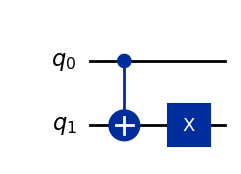

In [4]:
display(deutsch_function(3).draw(output="mpl"))

Next we will create the actual quantum circuit for Deutsch's algorithm, substituting the query gate with a quantum circuit implementation given as an argument. Shortly we'll plug in one of the four circuits defined by the function `deutsch_function` we defined earlier.
Barriers are included to show the visual separation between the query gate implementation and the rest of the circuit.

In [5]:
def compile_circuit(function: QuantumCircuit):
    # Compiles a circuit for use in Deutsch's algorithm.

    n = function.num_qubits - 1
    qc = QuantumCircuit(n + 1, n)

    qc.x(n)
    qc.h(range(n + 1))

    qc.barrier()
    qc.compose(function, inplace=True)
    qc.barrier()

    qc.h(range(n))
    qc.measure(range(n), range(n))

    return qc

Again we can see what the circuit looks like using the `draw` method.

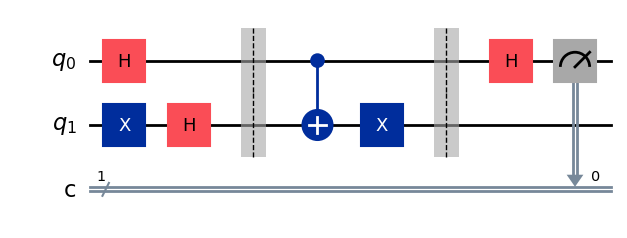

In [6]:
display(compile_circuit(deutsch_function(3)).draw(output="mpl"))

Finally, we'll create a function that runs the circuit just defined one time and outputs the appropriate result: "constant" or "balanced."

In [7]:
def deutsch_algorithm(function: QuantumCircuit):
    # Determine if a one-bit function is constant or balanced.

    qc = compile_circuit(function)

    result = AerSimulator().run(qc, shots=1, memory=True).result()
    measurements = result.get_memory()
    if measurements[0] == "0":
        return "constant"
    return "balanced"

We can now run Deutsch's algorithm on any one of the four functions defined above.

In [8]:
f = deutsch_function(3)
display(deutsch_algorithm(f))

'balanced'